# 環境構築



*   Pythonモジュールへのパス追加





In [1]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI


In [2]:
# import os

# os.chdir("/mnt/MachineLearning")

In [3]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [5]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221202.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,count_sum,count_timeMean
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,542230.0,902.212978
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,357158.0,594.272879
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,260040.0,432.678869
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,196341.6,326.691514
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,338083.8,562.535441
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,468402.6,779.372047
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,999154.6,1662.486855
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,807346.4,1343.338436
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,679656.2,1130.875541


In [6]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,count_sum,count_timeMean,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,542230.0,902.212978,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,357158.0,594.272879,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,260040.0,432.678869,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,196341.6,326.691514,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,338083.8,562.535441,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,468402.6,779.372047,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,999154.6,1662.486855,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,807346.4,1343.338436,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,679656.2,1130.875541,1,0,0


In [7]:
df_total = df_total.set_index('case_name')

In [8]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [9]:
df_total.std(numeric_only=True)

aircon               360.876287
ventilation           83.985694
n_from2sec           921.844114
n_from2sec/S          36.376848
count_sum         131824.640295
count_timeMean       219.342164
exhaust_a              0.495869
exhaust_b              0.495869
exhaust_off            0.344132
dtype: float64

In [10]:
from sklearn import preprocessing

#入力データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [12]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [22]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。
"""
officemodel_path = '/mnt/MachineLearning/OfficeModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

sampledPointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        

    pc_aircon = pc_dict[OfficePart.aircon]
    pc_airvent = pc_dict[OfficePart.airvent]
    pc_room = pc_dict[OfficePart.room]
    pc_base = np.concatenate([pc_aircon, pc_airvent, pc_room])
    num_sampling = NUM_POINTS - len(pc_base)

#     pc_forSampling = np.concatenate([pc_dict[OfficePart.body], pc_dict[OfficePart.desks]])
# #     pc_forSampling = pc_dict[OfficePart.desks]
#     print(f'#sampling {num_sampling} from {len(pc_forSampling)}', )
#     rand_list = random.sample(range(len(pc_forSampling)), k=num_sampling)
#     pc_sampled = pc_forSampling[rand_list, :]
    
    num_sampling_body = num_sampling // 2
    num_sampling_desks = num_sampling - num_sampling_body
    
    print("num_sampling_body = ", num_sampling_body)
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=num_sampling_body)
    pc_sampled_body = pc_body[rand_list, :]
    
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    
    
#     pointCloud = np.concatenate([pc_base, pc_sampled])
    pointCloud = np.concatenate([pc_base, pc_sampled_body, pc_sampled_desks])
    print(pointCloud.shape)
    sampledPointCloud_dict[officename] = pointCloud


['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']
OfficePart.aircon
OfficePart.airvent
OfficePart.body
OfficePart.room
OfficePart.desks
['/mnt/MachineLearning/OfficeModel/model_origin/case1/aircon/aircon_body.stl', '/mnt/MachineLearning/OfficeModel/model_origin/case1/aircon/aircon_inlets.stl', '/mnt/MachineLearning/OfficeModel/model_origin/case1/aircon/aircon_outlet.stl']
['/mnt/MachineLearning/OfficeModel/model_origin/case1/airvent/20210812_airvent_a.stl', '/mnt/MachineLearning/OfficeModel/model_origin/case1/airvent/airvent_b.stl']
['/mnt/MachineLearning/OfficeModel/model_origin/case1/body/20210810_bodies.stl']
['/mnt/MachineLearning/OfficeModel/model_origin/case1/room/20210810_office_bottom.stl', '/mnt/MachineLearnin

In [11]:
import numpy as np

pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

# np.save(pcFilePath, sampledPointCloud_dict, allow_pickle='TRUE')

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
sampledPointCloud_dict = a.item()
sampledPointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

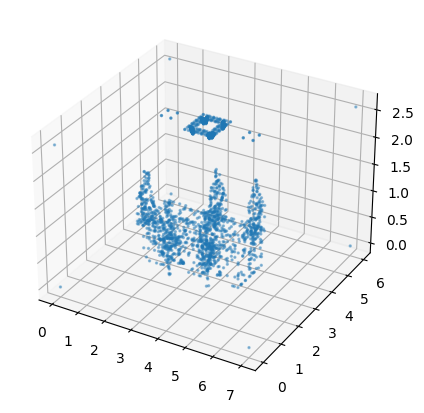

In [12]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(sampledPointCloud_dict['office10'])

In [13]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [14]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [15]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [34]:
pre_office_list = [f'office{officeID}' for officeID in [1,2,3,7,10,15,16,22,28]]
pre_office_list

['office1',
 'office2',
 'office3',
 'office7',
 'office10',
 'office15',
 'office16',
 'office22',
 'office28']

In [37]:
df_pre = df_total[df_total["office"].isin(pre_office_list)]
df_pre

,office,aircon,ventilation,n_from2sec,n_from2sec/S,count_sum,count_timeMean,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,542230.0,902.212978,0,0,1
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,357158.0,594.272879,1,0,0
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,260040.0,432.678869,0,1,0
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,196341.6,326.691514,1,0,0
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,338083.8,562.535441,0,1,0
...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,468402.6,779.372047,0,1,0
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,999154.6,1662.486855,1,0,0
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,807346.4,1343.338436,0,1,0


In [78]:
def get_dataset(df_main, df_meta):
    '''
    説明変数と目的変数をNDArrayに変換する
    '''
    case_index_list = list(df_main.index)
    # case_index_list = list(df_total["casename"])

    pointCloudArray_list = []
    metaArray_list = []

    RoI_list = []

    for case_index in case_index_list:
        office_name = case_index.split('_', maxsplit=1)[0]
        pointCloudArray_list.append(sampledPointCloud_dict[office_name])
        
        metaArray_list.append(df_meta.loc[case_index])
            
        RoI_list.append(df_main["n_from2sec/S"].loc[case_index])
        # RoI_list.append(df_main["count_timeMean"].loc[case_index])

    case_index_array = np.array(case_index_list)
    metaArray = np.array(metaArray_list)
    RoIArray = np.array(RoI_list)

    pointCloudArray = np.array(pointCloudArray_list)
    
    return case_index_array, pointCloudArray, metaArray, RoIArray.reshape(-1,1)


In [84]:
X_index, X_pc, X_meta, y = get_dataset(df_pre, df_meta)

# print(X_pc.max())
# X_pc /= X_pc.max() #Normalization
# print(X_pc.max())


#Standardization
X_pc = ( X_pc - X_pc.std() ) / X_pc.std()

X_pc.std()

1.0

In [85]:
print(X_index.shape)

print(X_pc.shape, X_pc.mean(), X_pc.var())
print(X_meta.shape, X_meta.mean(), X_meta.var())

print(y.shape, y.mean(), y.var())

(263,)
(263, 2048, 3) 0.6781772 1.0000001
(263, 5) 128.4083650190114 65524.36631785916
(263, 1) 155.3182443774571 1654.7277681802384


In [41]:
X_index

array(['office2_0_0', 'office2_0_164_aout', 'office2_0_164_bout',
       'office2_0_246_aout', 'office2_0_246_bout', 'office2_0_82_aout',
       'office2_0_82_bout', 'office2_360_0', 'office2_360_164_aout',
       'office2_360_164_bout', 'office2_360_246_aout',
       'office2_360_246_bout', 'office2_360_82_aout',
       'office2_360_82_bout', 'office2_660_0', 'office2_660_164_aout',
       'office2_660_164_bout', 'office2_660_246_aout',
       'office2_660_246_bout', 'office2_660_82_aout',
       'office2_660_82_bout', 'office2_960_0', 'office2_960_164_aout',
       'office2_960_164_bout', 'office2_960_246_aout',
       'office2_960_246_bout', 'office2_960_82_aout',
       'office2_960_82_bout', 'office15_0_0', 'office15_0_164_aout',
       'office15_0_164_bout', 'office15_0_246_aout',
       'office15_0_246_bout', 'office15_0_82_aout', 'office15_0_82_bout',
       'office15_360_0', 'office15_360_164_aout', 'office15_360_164_bout',
       'office15_360_246_aout', 'office15_360_246_bou

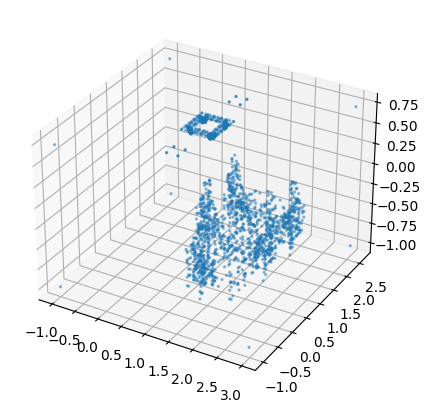

In [42]:
plot3d_points(X_pc[0, :,:])

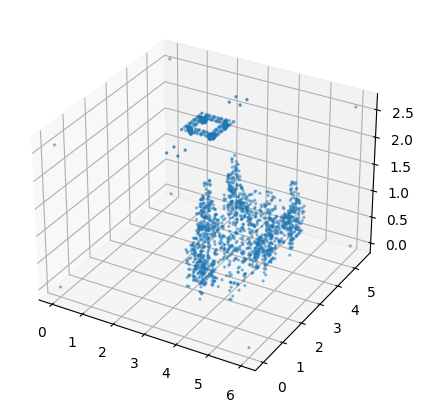

In [43]:
plot3d_points(sampledPointCloud_dict["office2"])

# チューニング

In [44]:
import random

def train_test_office_split(office_for_test:str, case_index_array, train_shuffle:bool):
    '''
    特定のofficeだけ、テスト用に分割。
    '''
    train_ID = []
    test_ID = []

    for (ID, case_index) in enumerate(case_index_array):
        if office_for_test+'_' in case_index:
            test_ID.append(ID) 
        else:
            train_ID.append(ID)
    
    if train_shuffle:
        random.shuffle(train_ID)
    
    return train_ID, test_ID

In [45]:
casename_list = list(df_total.index)

office_list = []

for casename in casename_list:
    officename = casename.split('_')[0]
    if officename not in office_list:
        office_list.append(officename)

office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [56]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]

In [57]:
for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    print(len(fit_ID), len(test_ID))
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    for val_office in val_office_list:
        print("val_office:", val_office)
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit, train_shuffle=True)
        print(len(train_ID), len(val_ID))
        
        X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
        X_meta_train, X_meta_val = X_meta_fit[train_ID], X_meta_fit[val_ID]
        y_train, y_val = y_fit[train_ID], y_fit[val_ID]
    
        print(X_index_fit[train_ID])


test_office: office1
224 39
val_office: office7
196 28
['office28_0_82_aout' 'office2_660_0' 'office28_660_0'
 'office28_360_164_aout' 'office16_0_246_aout' 'office3_360_246_bout'
 'office28_0_246_aout' 'office15_660_82_aout' 'office15_0_164_bout'
 'office15_360_82_aout' 'office3_0_82_bout' 'office3_0_0'
 'office3_660_246_bout' 'office28_660_82_bout' 'office16_960_0'
 'office22_360_82_aout' 'office10_960_82_aout' 'office22_960_164_bout'
 'office22_660_82_aout' 'office28_0_164_aout' 'office10_660_164_aout'
 'office22_0_246_bout' 'office15_660_164_aout' 'office16_0_82_aout'
 'office22_0_82_bout' 'office2_960_82_aout' 'office22_960_82_aout'
 'office22_960_0' 'office2_0_0' 'office28_660_164_bout'
 'office15_0_246_bout' 'office3_960_246_aout' 'office28_660_246_bout'
 'office15_360_246_aout' 'office10_960_246_bout' 'office3_360_164_aout'
 'office2_660_246_aout' 'office2_0_82_bout' 'office2_660_164_bout'
 'office3_660_0' 'office2_0_164_aout' 'office16_0_164_aout'
 'office16_660_82_bout' 'offi

In [58]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4028829508815037546
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10036445184
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1956823589168967703
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-05 06:14:42.515889: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [59]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [60]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/9offices_stude.db'

NUM_POINTS = X_pc.shape[1]

def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_pointCloud = keras.Input(shape=(NUM_POINTS, 3), name='pointCloud')
    input_meta = keras.Input(shape=(X_meta.shape[1], ), name='meta')
    
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    hp_is_BatchNormalization_necessary = trial.suggest_categorical('is_BatchNormalization_necessary', [True, False])
    if hp_is_BatchNormalization_necessary:
        hp_momentum_bn = trial.suggest_categorical('momentum_bn', [0.0, 0.99])
        
    hp_is_HeNormalization_necessary = trial.suggest_categorical('is_HeNormalization_necessary', [True, False])
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        # x = conv_bn(x, hp_filters)
        
        if hp_is_HeNormalization_necessary:
            x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid", kernel_initializer="he_normal")(x)
        else:
            x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
            
        if hp_is_BatchNormalization_necessary:
            x = keras.layers.BatchNormalization(momentum=hp_momentum_bn)(x)
            
        x = keras.layers.ReLU()(x)
    
    features_pc = keras.layers.GlobalMaxPooling1D()(x)
    
    # hp_is_dense_bn_necessary = trial.suggest_categorical('is_dense_bn_necessary', [True, False])
    # if hp_is_dense_bn_necessary:
    #     hp_features = trial.suggest_int('features', 8, 64, step=8)
    #     features_pc = dense_bn(x, hp_features)
    # else:
    #     features_pc = x
    
    x = keras.layers.Concatenate()([features_pc, input_meta])
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    outputs = keras.layers.Dense(1)(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=[input_pointCloud, input_meta], outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, X_index_fit, X_pc_fit, X_meta_fit, y_fit, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()

    mse_list = []
    
    for val_office in val_office_list:
        train_ID, val_ID = train_test_office_split(val_office, X_index_fit, train_shuffle=True)
        
        X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
        X_meta_train, X_meta_val = X_meta_fit[train_ID], X_meta_fit[val_ID]
        y_train, y_val = y_fit[train_ID], y_fit[val_ID]
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128, 256])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        model.fit(
            {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
            validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_list.append(evaluate[0]) #:MSE
        
    return np.mean(mse_list)


In [61]:
for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        sampler=optuna.samplers.RandomSampler(),
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, X_index_fit, X_pc_fit, X_meta_fit, y_fit, val_office_list),
        n_trials=200,
        gc_after_trial=True
    )


test_office: office1


[I 2022-12-05 06:14:59,547] A new study created in RDB with name: office1_is_test
2022-12-05 06:14:59.868970: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6
2022-12-05 06:15:02.451125: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2022-12-05 06:15:03.132788: I tensorflow/stream_executor/cuda/cuda_blas.cc:1804] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
[I 2022-12-05 06:15:13,206] Trial 0 finished with value: 2116.7873352050783 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 64, 'filters-1': 128, 'filters-2': 224, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 192, 'units-1': 384, 'units-2': 384, 'lr': 0.009138273630091578, 

test_office: office7


[I 2022-12-05 07:49:13,397] Trial 0 finished with value: 2624.726452636719 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'filters-1': 224, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'lr': 0.0026257966380672363, 'batch_size': 128}. Best is trial 0 with value: 2624.726452636719.
[I 2022-12-05 07:50:30,694] Trial 1 finished with value: 2042.7248046875 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'units-2': 320, 'units-3': 256, 'lr': 0.0067512759900618365, 'batch_size': 1}. Best is trial 1 with value: 2042.7248046875.
[I 2022-12-05 07:50:52,862] Trial 2 finished with value: 59400.33984375 and parameters: {'conv_layers': 3, 'is_BatchNormalization

test_office: office10


[I 2022-12-05 09:28:28,285] Trial 0 finished with value: 6596.836804199219 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 192, 'filters-1': 160, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'units-2': 320, 'units-3': 320, 'lr': 0.00022144829827949449, 'batch_size': 32}. Best is trial 0 with value: 6596.836804199219.
[I 2022-12-05 09:29:41,148] Trial 1 finished with value: 14077.88344116211 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.0, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 448, 'units-3': 64, 'lr': 0.09477755641119444, 'batch_size': 4}. Best is trial 0 with value: 6596.836804199219.
[I 2022-12-05 09:29:54,565] Trial 2 finished with value: 1666.5483673095703 and parameters: {'conv_layers': 2, 'i

test_office: office16


[I 2022-12-05 11:06:40,363] Trial 0 finished with value: 2784.1466064453125 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': False, 'filters-0': 128, 'filters-1': 192, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 192, 'lr': 0.04480088322036544, 'batch_size': 128}. Best is trial 0 with value: 2784.1466064453125.
[I 2022-12-05 11:07:02,151] Trial 1 finished with value: 3339.9400024414062 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.0, 'is_HeNormalization_necessary': False, 'filters-0': 224, 'filters-1': 96, 'filters-2': 160, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 448, 'units-1': 448, 'units-2': 128, 'lr': 0.0002616593017294588, 'batch_size': 128}. Best is trial 0 with value: 2784.1466064453125.
[I 2022-12-05 11:07:20,776] Trial 2 finished with value: 3827.3173706054686 and parameters: {'conv_layers

test_office: office22


[I 2022-12-05 12:45:51,022] Trial 0 finished with value: 2380.1899810791015 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'filters-1': 128, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 384, 'units-1': 128, 'units-2': 512, 'lr': 0.002185113426772166, 'batch_size': 64}. Best is trial 0 with value: 2380.1899810791015.
[I 2022-12-05 12:46:56,385] Trial 1 finished with value: 3445.097058105469 and parameters: {'conv_layers': 3, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.99, 'is_HeNormalization_necessary': True, 'filters-0': 128, 'filters-1': 224, 'filters-2': 256, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': None, 'units-0': 192, 'units-1': 256, 'units-2': 448, 'lr': 0.006668295850683548, 'batch_size': 1}. Best is trial 0 with value: 2380.1899810791015.
[I 2022-12-05 12:47:05,369] Trial 2 finished with value: 5547.48369140625 and parameters: {'conv_layers': 1, '

test_office: office28


[I 2022-12-05 14:30:08,884] Trial 0 finished with value: 2412.5791870117187 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.0, 'is_HeNormalization_necessary': False, 'filters-0': 160, 'dense_layers': 2, 'activation': 'ELU', 'dropout': None, 'units-0': 256, 'units-1': 384, 'lr': 0.0001232571876509426, 'batch_size': 1}. Best is trial 0 with value: 2412.5791870117187.
[I 2022-12-05 14:30:18,738] Trial 1 finished with value: 5754.32099609375 and parameters: {'conv_layers': 1, 'is_BatchNormalization_necessary': True, 'momentum_bn': 0.0, 'is_HeNormalization_necessary': True, 'filters-0': 64, 'dense_layers': 3, 'activation': 'ELU', 'dropout': 0.5, 'units-0': 448, 'units-1': 384, 'units-2': 384, 'lr': 0.00032135562891163257, 'batch_size': 128}. Best is trial 0 with value: 2412.5791870117187.
[I 2022-12-05 14:30:31,864] Trial 2 finished with value: 2576.284704589844 and parameters: {'conv_layers': 2, 'is_BatchNormalization_necessary': False, 'is_HeNo

# チューニング結果確認

In [62]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

In [63]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
    X_index_fit = X_index[fit_ID]
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    
    train_ID, val_ID = train_test_office_split(val_office_list[0], X_index_fit, train_shuffle=True)

    X_pc_train, X_pc_val = X_pc_fit[train_ID], X_pc_fit[val_ID]
    X_meta_train, X_meta_val = X_meta_fit[train_ID], X_meta_fit[val_ID]
    y_train, y_val = y_fit[train_ID], y_fit[val_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
        validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221206-022352
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_5 (Conv1D)              (None, 2048, 128)    512         ['pointCloud[0][0]']             
                                                                                                  
 re_lu_5 (ReLU)                 (None, 2048, 128)    0           ['conv1d_5[0][0]']               
                                                                                                  
 conv1d_6 (Conv1D)              (None, 2048, 64)     8256        ['re_lu_5[0][0]']                
       

In [64]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221206-022352'

In [65]:
%load_ext tensorboard

In [66]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 645.4853698730469
  Params: 
    batch_size: 4
    conv_layers: 3
    dense_layers: 0
    filters-0: 128
    filters-1: 64
    filters-2: 96
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.004375176408673365


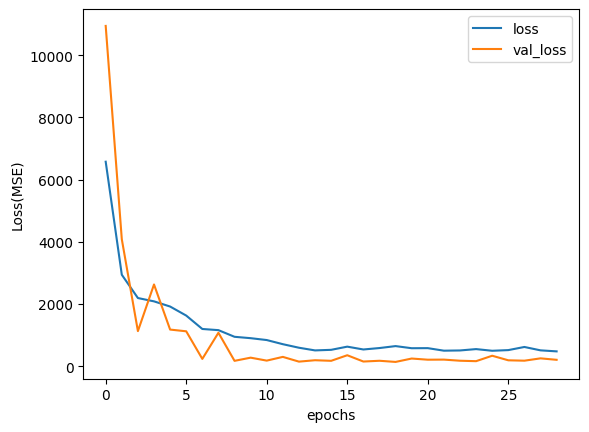

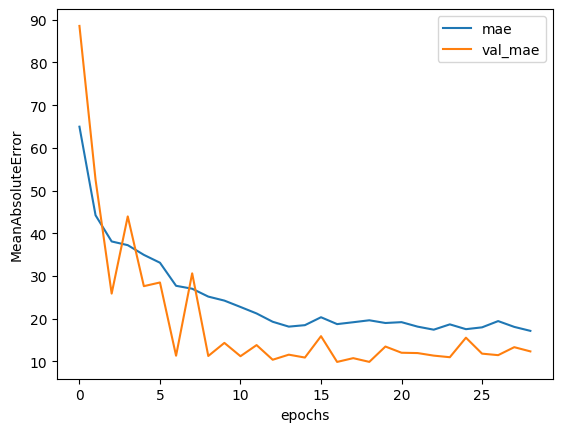

Best trial (test for office7):
  Value: 688.2375030517578
  Params: 
    activation: ReLU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: 0.5
    filters-0: 256
    filters-1: 96
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.0040747450783895885
    units-0: 256
    units-1: 128


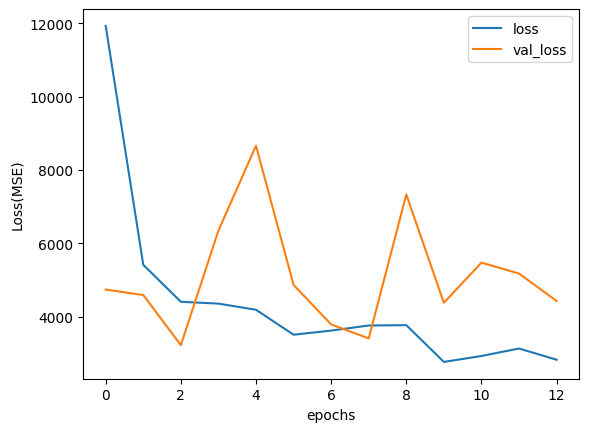

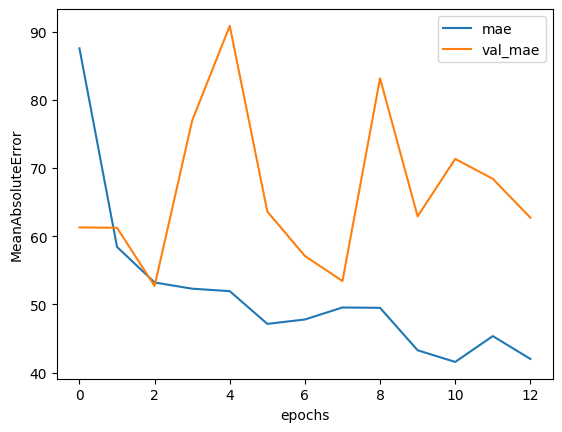

Best trial (test for office10):
  Value: 573.1525573730469
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: None
    filters-0: 32
    filters-1: 224
    is_BatchNormalization_necessary: True
    is_HeNormalization_necessary: False
    lr: 0.01898646502112845
    momentum_bn: 0.0
    units-0: 512
    units-1: 64


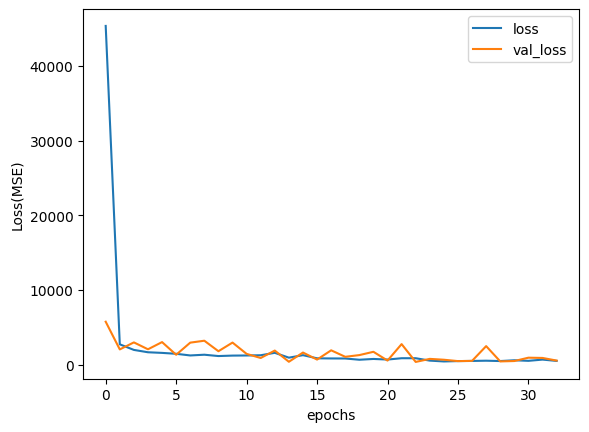

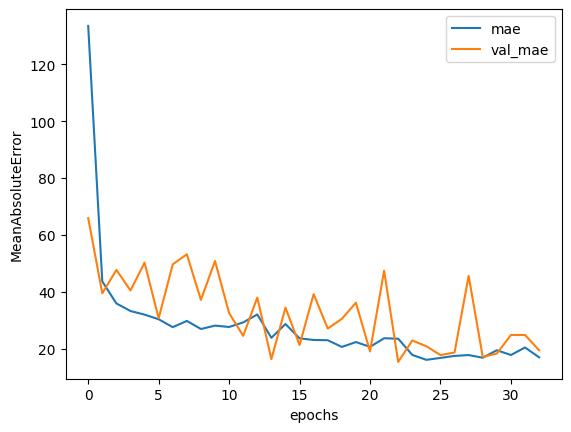

Best trial (test for office16):
  Value: 769.129281616211
  Params: 
    batch_size: 1
    conv_layers: 2
    dense_layers: 0
    filters-0: 128
    filters-1: 160
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.01130684432555883


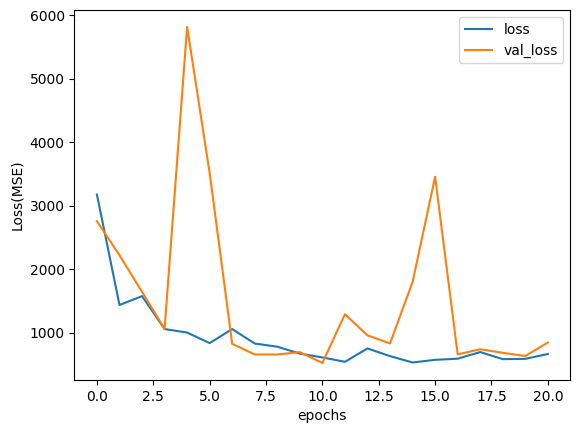

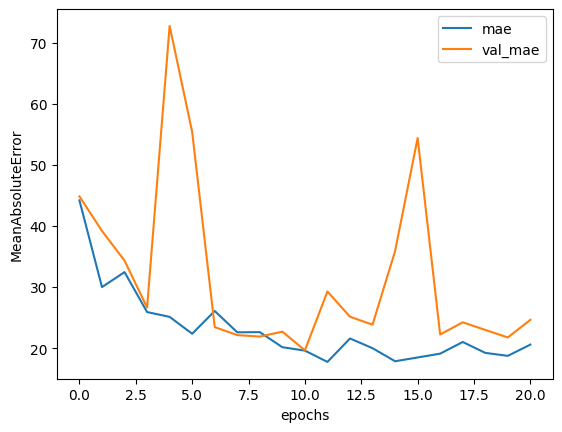

Best trial (test for office22):
  Value: 804.2523544311523
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 3
    dense_layers: 1
    dropout: 0.3
    filters-0: 192
    filters-1: 160
    filters-2: 128
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.02818776340783389
    units-0: 128


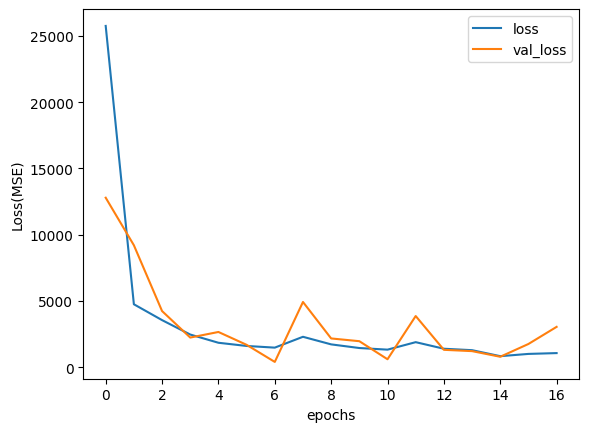

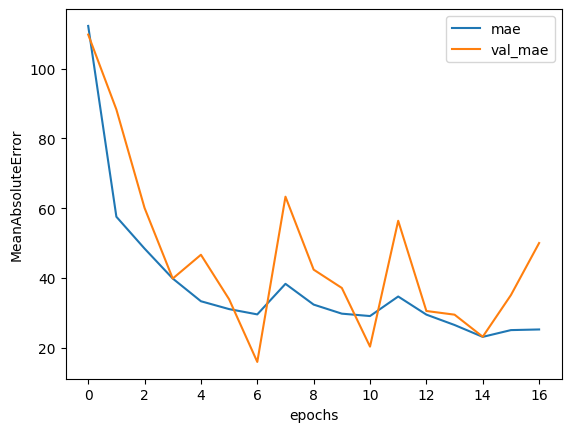

Best trial (test for office28):
  Value: 1372.994332885742
  Params: 
    activation: ELU
    batch_size: 4
    conv_layers: 3
    dense_layers: 3
    dropout: 0.5
    filters-0: 224
    filters-1: 128
    filters-2: 224
    is_BatchNormalization_necessary: True
    is_HeNormalization_necessary: False
    lr: 0.0035618114465259085
    momentum_bn: 0.0
    units-0: 192
    units-1: 320
    units-2: 448


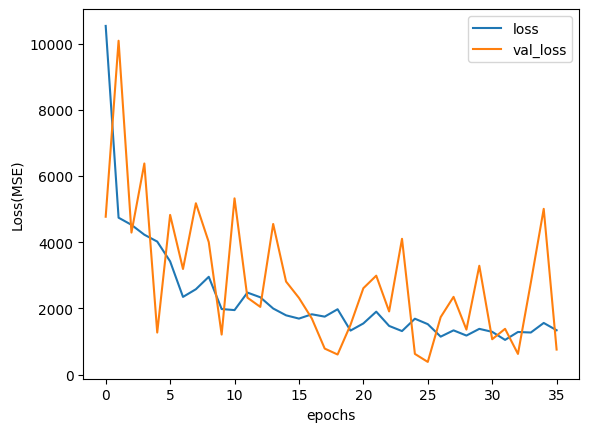

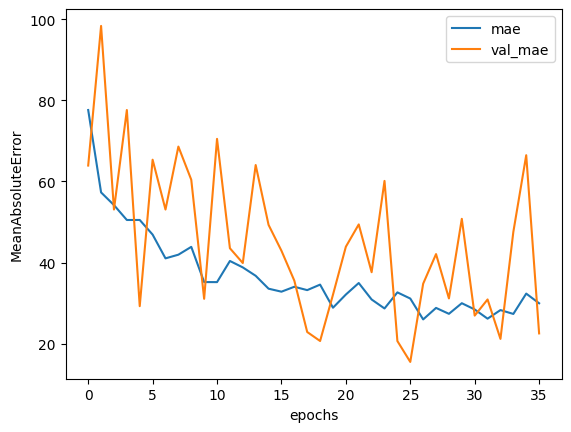

In [67]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

In [68]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
    X_index_fit = X_index[fit_ID]
    
    X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
    X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
    y_fit, y_test = y[fit_ID], y[test_ID]
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
56/56 [==============================] - 1s 6ms/step - loss: 4390.3306 - mae: 52.6058 - val_loss: 4403.6655 - val_mae: 58.3037
Epoch 2/200
56/56 [==============================] - 0s 3ms/step - loss: 2309.0203 - mae: 39.5838 - val_loss: 3146.3748 - val_mae: 46.6753
Epoch 3/200
56/56 [==============================] - 0s 3ms/step - loss: 1982.6660 - mae: 35.3925 - val_loss: 4035.4167 - val_mae: 56.4931
Epoch 4/200
56/56 [==============================] - 0s 3ms/step - loss: 1434.8041 - mae: 29.8736 - val_loss: 3680.2776 - val_mae: 54.7877
Epoch 5/200
56/56 [==============================] - 0s 5ms/step - loss: 1097.7797 - mae: 26.0039 - val_loss: 2590.0220 - val_mae: 43.6986
Epoch 6/200
56/56 [==============================] - 0s 5ms/step - loss: 1013.1246 - mae: 24.6762 - val_loss: 2156.9771 - val_mae: 38.8299
Epoch 7/200
56/56 [==============================] - 0s 3ms/step - loss: 869.8149 - mae: 22.6598 - val_loss: 3234.5564 - val_mae: 51.5927
Epoch 8

Best trial (test for office1):
  Value: 645.4853698730469
  Params: 
    batch_size: 4
    conv_layers: 3
    dense_layers: 0
    filters-0: 128
    filters-1: 64
    filters-2: 96
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.004375176408673365


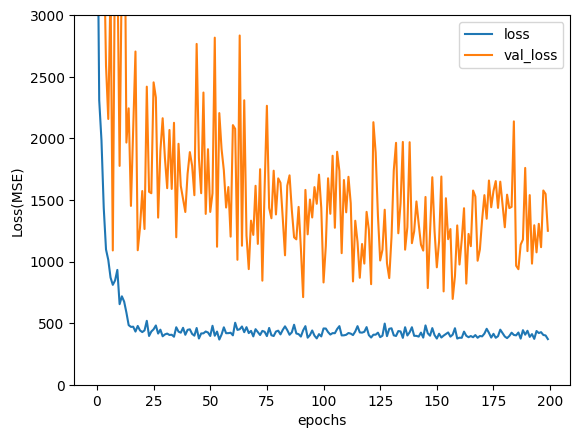

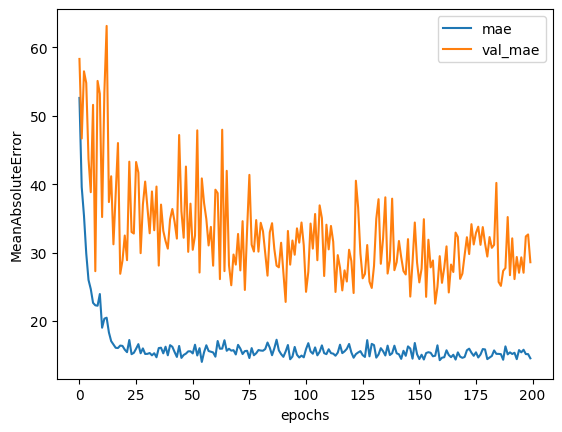

Best trial (test for office7):
  Value: 688.2375030517578
  Params: 
    activation: ReLU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: 0.5
    filters-0: 256
    filters-1: 96
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.0040747450783895885
    units-0: 256
    units-1: 128


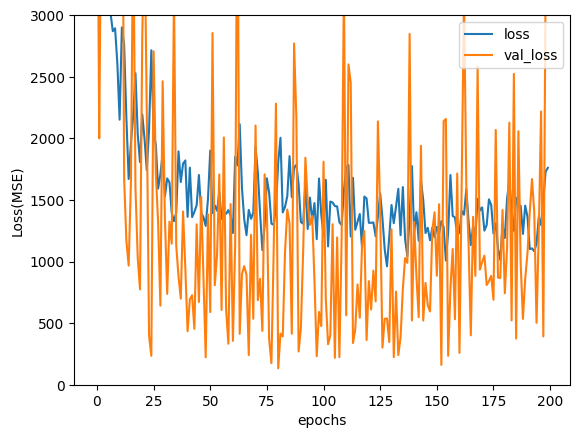

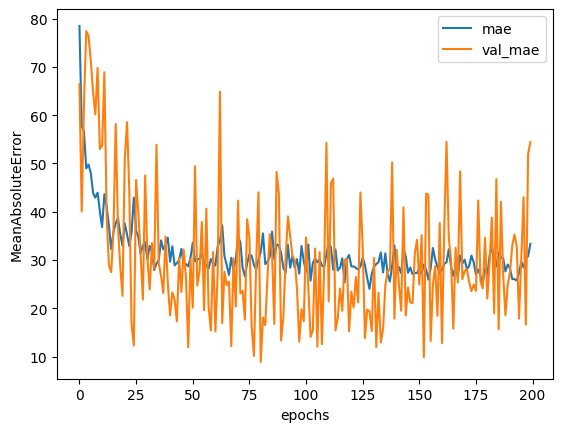

Best trial (test for office10):
  Value: 573.1525573730469
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: None
    filters-0: 32
    filters-1: 224
    is_BatchNormalization_necessary: True
    is_HeNormalization_necessary: False
    lr: 0.01898646502112845
    momentum_bn: 0.0
    units-0: 512
    units-1: 64


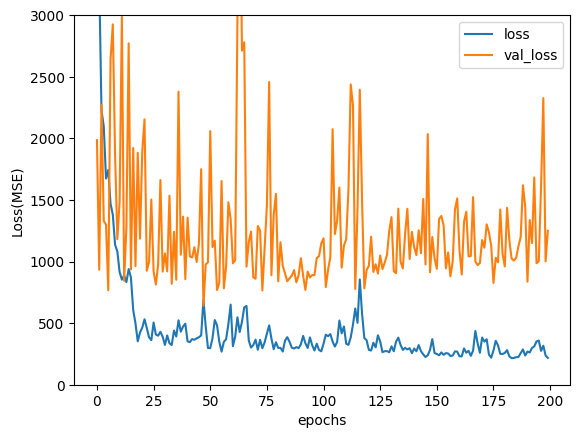

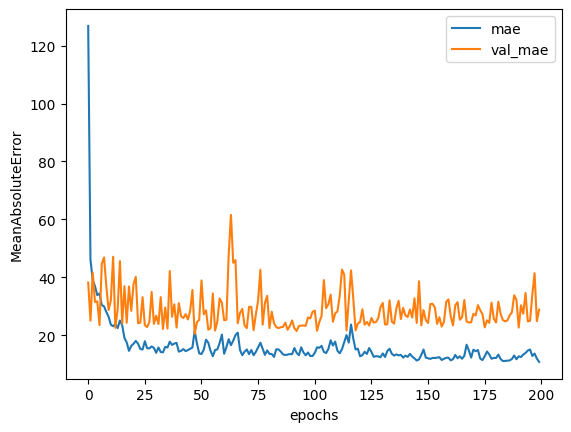

Best trial (test for office16):
  Value: 769.129281616211
  Params: 
    batch_size: 1
    conv_layers: 2
    dense_layers: 0
    filters-0: 128
    filters-1: 160
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.01130684432555883


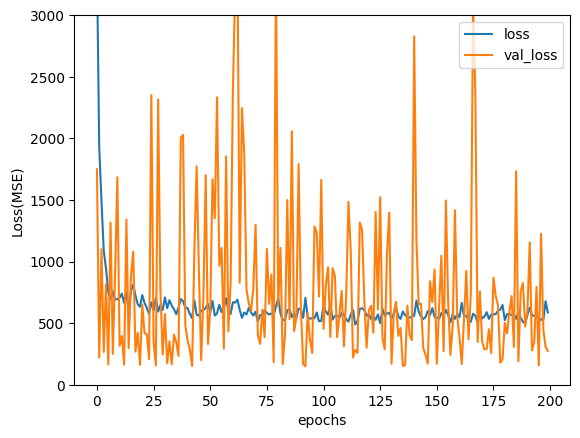

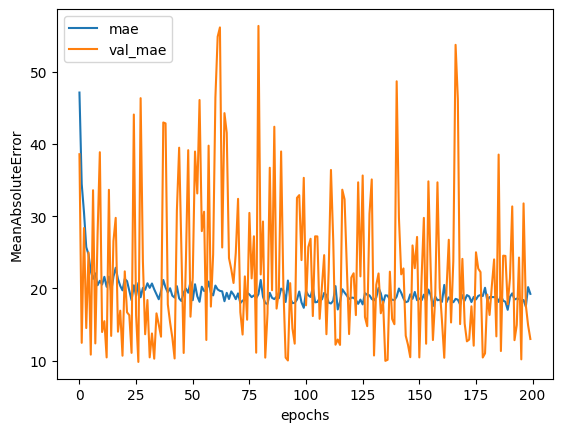

Best trial (test for office22):
  Value: 804.2523544311523
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 3
    dense_layers: 1
    dropout: 0.3
    filters-0: 192
    filters-1: 160
    filters-2: 128
    is_BatchNormalization_necessary: False
    is_HeNormalization_necessary: True
    lr: 0.02818776340783389
    units-0: 128


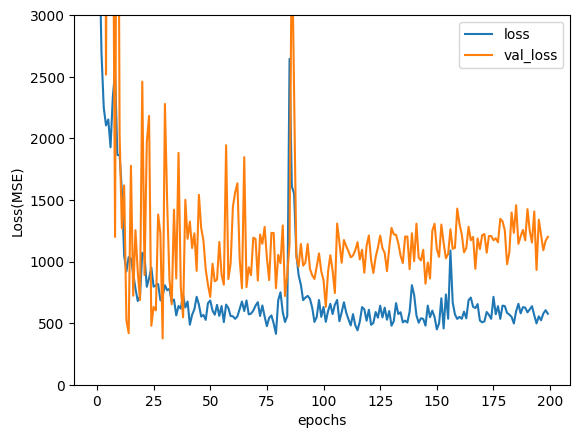

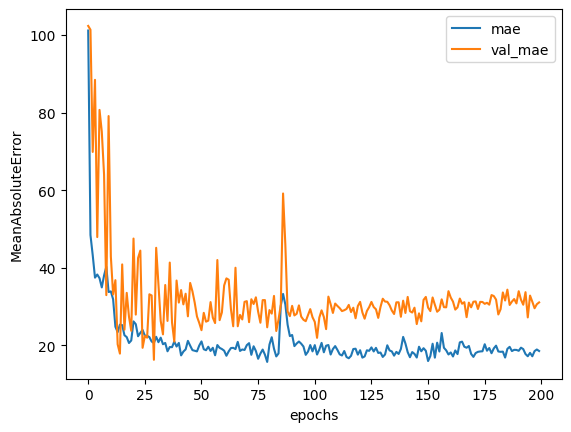

Best trial (test for office28):
  Value: 1372.994332885742
  Params: 
    activation: ELU
    batch_size: 4
    conv_layers: 3
    dense_layers: 3
    dropout: 0.5
    filters-0: 224
    filters-1: 128
    filters-2: 224
    is_BatchNormalization_necessary: True
    is_HeNormalization_necessary: False
    lr: 0.0035618114465259085
    momentum_bn: 0.0
    units-0: 192
    units-1: 320
    units-2: 448


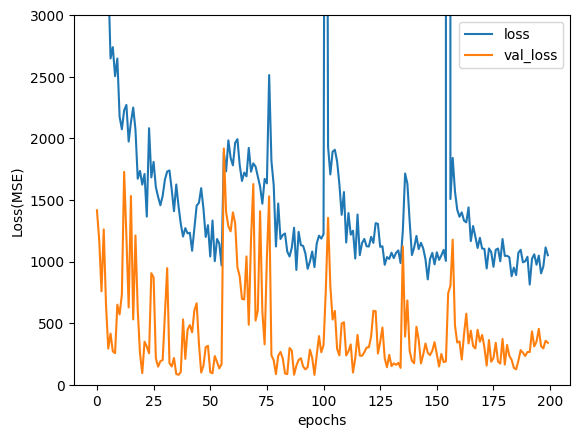

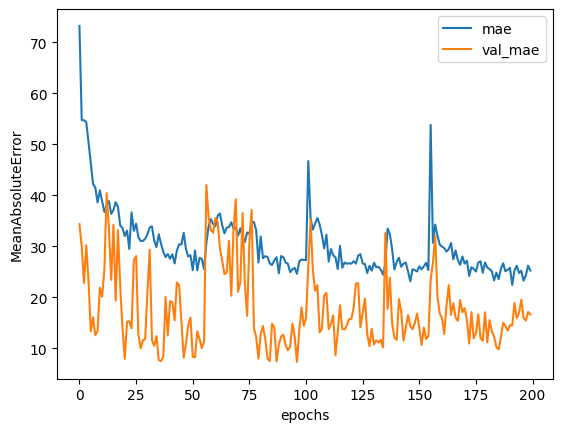

In [70]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True)
        
    plot_history(result_dict["history"].history, ymax=3000.)

# データの追加による変化を見る

In [107]:
X_index_added, X_pc_added, X_meta_added, y_added = get_dataset(df_total, df_meta)


#Standardization
X_pc_added = ( X_pc_added - X_pc_added.std() ) / X_pc_added.std()

X_pc_added.std()

1.0000004

In [108]:
print(X_pc.shape)
print(X_pc_added.shape)

(263, 2048, 3)
(431, 2048, 3)


In [109]:
print(X_index.shape)
print(X_index_added.shape)

(263,)
(431,)


In [110]:
test_office = "office10"

print("test_office:", test_office)


study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial


test_office: office10


In [116]:
"""
９オフィスで検証（学習：８、検証１）
"""

fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
X_index_fit = X_index[fit_ID]

X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
y_fit, y_test = y[fit_ID], y[test_ID]

print(X_pc_fit.shape)

best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

y_fit_pred = best_model.predict({'pointCloud':X_pc_fit, 'meta':X_meta_fit})
y_test_pred = best_model.predict({'pointCloud':X_pc_test, 'meta':X_meta_test})

(235, 2048, 3)
Epoch 1/200
15/15 [==============================] - 2s 20ms/step - loss: 35292.0000 - mae: 123.1585 - val_loss: 1594.4427 - val_mae: 31.1266
Epoch 2/200
15/15 [==============================] - 0s 12ms/step - loss: 2825.4478 - mae: 43.1408 - val_loss: 1598.9017 - val_mae: 34.1810
Epoch 3/200
15/15 [==============================] - 0s 10ms/step - loss: 2178.1521 - mae: 38.4685 - val_loss: 1190.9688 - val_mae: 29.5401
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 1734.7810 - mae: 34.2864 - val_loss: 1317.3320 - val_mae: 31.7307
Epoch 5/200
15/15 [==============================] - 0s 8ms/step - loss: 1471.4657 - mae: 31.1066 - val_loss: 3389.5535 - val_mae: 50.4119
Epoch 6/200
15/15 [==============================] - 0s 8ms/step - loss: 1439.6521 - mae: 30.9326 - val_loss: 799.6879 - val_mae: 20.8855
Epoch 7/200
15/15 [==============================] - 0s 8ms/step - loss: 1215.1962 - mae: 28.5035 - val_loss: 2462.6755 - val_mae: 43.7534
Epoch 8/

In [117]:
"""
１５オフィスで検証（学習：９、検証６）
"""

fit_ID, test_ID = train_test_office_split(test_office, X_index_added, train_shuffle=True)
X_index_fit = X_index_added[fit_ID]

X_pc_fit, X_pc_test = X_pc_added[fit_ID], X_pc_added[test_ID]
X_meta_fit, X_meta_test = X_meta_added[fit_ID], X_meta_added[test_ID]
y_fit, y_test = y_added[fit_ID], y_added[test_ID]

print(X_pc_fit.shape)

best_model_added = total_model_builder(best_trial)

test_history_added = best_model_added.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

y_fit_pred_added = best_model_added.predict({'pointCloud':X_pc_fit, 'meta':X_meta_fit})
y_test_pred_added = best_model_added.predict({'pointCloud':X_pc_test, 'meta':X_meta_test})

(403, 2048, 3)
Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 20133.6582 - mae: 89.9065 - val_loss: 4209.4307 - val_mae: 57.8934
Epoch 2/200
26/26 [==============================] - 0s 7ms/step - loss: 1658.5029 - mae: 32.2820 - val_loss: 1637.5458 - val_mae: 35.1154
Epoch 3/200
26/26 [==============================] - 0s 7ms/step - loss: 1152.9259 - mae: 27.6741 - val_loss: 1353.2878 - val_mae: 31.0520
Epoch 4/200
26/26 [==============================] - 0s 7ms/step - loss: 1026.7881 - mae: 24.7372 - val_loss: 1671.4340 - val_mae: 33.8702
Epoch 5/200
26/26 [==============================] - 0s 7ms/step - loss: 1407.2865 - mae: 29.6422 - val_loss: 1824.3959 - val_mae: 37.0368
Epoch 6/200
26/26 [==============================] - 0s 7ms/step - loss: 891.5405 - mae: 24.1628 - val_loss: 2263.0671 - val_mae: 41.0437
Epoch 7/200
26/26 [==============================] - 0s 8ms/step - loss: 845.0366 - mae: 23.3870 - val_loss: 1148.5996 - val_mae: 27.5932
Epoch 8/200


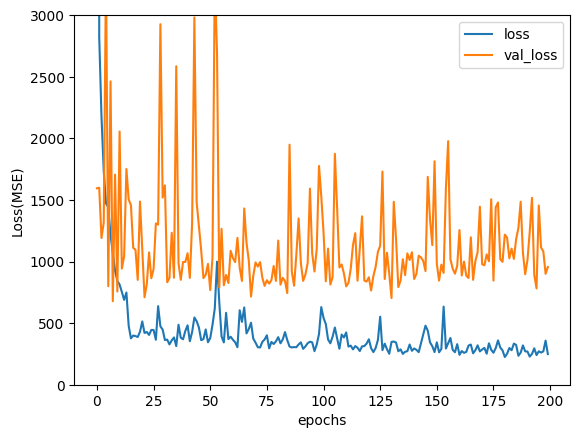

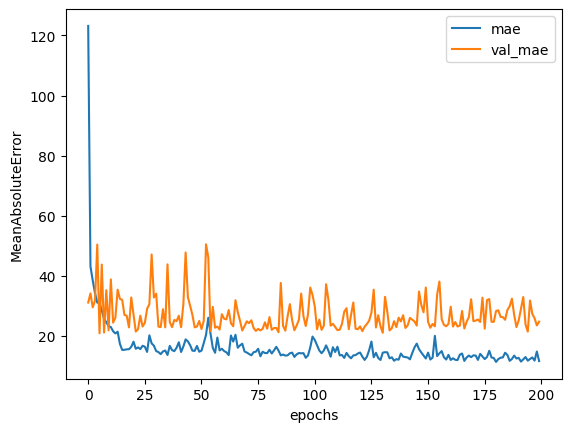

In [118]:
plot_history(test_history.history, ymax=3000)

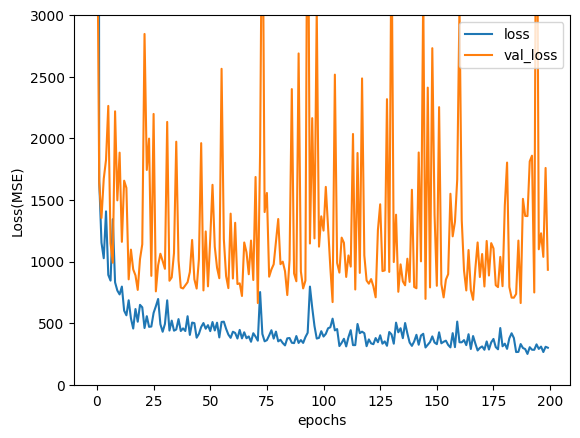

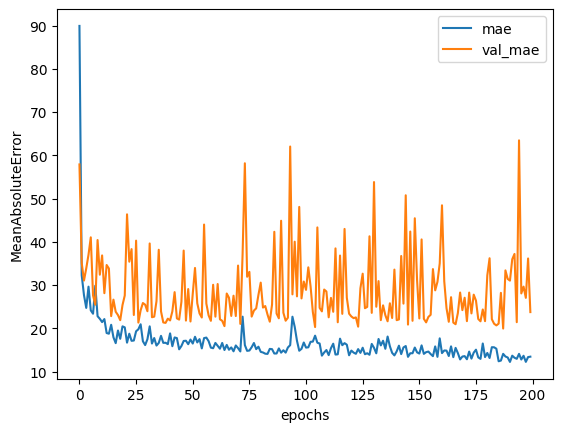

In [119]:
plot_history(test_history_added.history, ymax=3000)

In [73]:
from importlib import reload # >= python 3.4
reload(show_mod)

<module 'show_mod' from '/mnt/MachineLearning/modules/show_mod.py'>

In [77]:
y_fit_pred.shape

(1612, 1)

In [84]:
(y_fit_pred - y_fit.reshape((-1,1))).shape

(1612, 1)

In [80]:
y_fit.shape

(1612,)

In [82]:
y_test.reshape((-1,1)).shape

(112, 1)

In [97]:
office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [94]:
X_index_fit.shape

(1612,)

In [107]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "red")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name in  office_array[i]+'_']
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_527298/870009824.py:23: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")


<Figure size 1000x800 with 0 Axes>

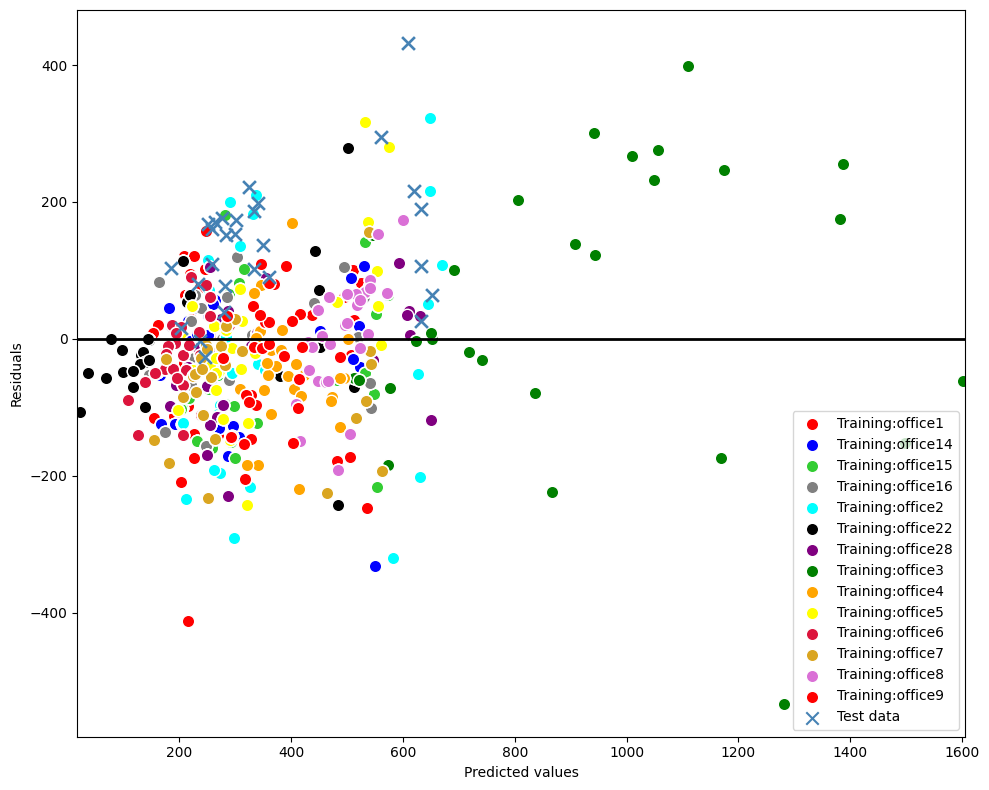

In [108]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.reshape((-1,1)), 
                            office_array=X_index_fit
                                  )

In [116]:
idxmax = df_total["count_timeMean"].idxmax()

df_total.loc[idxmax]

office                office3
aircon                  660.0
ventilation             164.0
n_from2sec             3603.6
n_from2sec/S            109.2
count_sum           1090752.8
count_timeMean    1814.896506
exhaust_a                   1
exhaust_b                   0
exhaust_off                 0
Name: office3_660_164_aout, dtype: object

In [119]:
df_total[df_total['office'] == "office1"]["count_timeMean"]

case_name
office1_0_0             402.713478
office1_0_123_aout      530.467554
office1_0_123_bout      677.838270
office1_0_164_aout      410.265557
office1_0_164_bout      582.445923
office1_0_205_aout      484.694176
office1_0_205_bout      444.558735
office1_0_246_aout      575.436938
office1_0_246_bout      782.500499
office1_0_41_aout       515.164725
office1_0_41_bout       660.099501
office1_0_82_aout       479.025624
office1_0_82_bout       433.388686
office1_660_0           144.402662
office1_660_123_aout    313.367388
office1_660_123_bout    252.402995
office1_660_164_aout    106.163062
office1_660_164_bout    162.394343
office1_660_205_aout     89.865225
office1_660_205_bout    195.755740
office1_660_246_aout    409.765724
office1_660_246_bout    143.554409
office1_660_41_aout     412.403661
office1_660_41_bout     124.602662
office1_660_82_aout      86.658236
office1_660_82_bout     399.352413
office1_960_0           270.130782
office1_960_123_aout    303.649584
office1_96

0 28
28 56
56 84
84 123
123 151
151 179
179 207
207 235
235 263
263 291
291 319
319 347
347 375
375 403
403 431


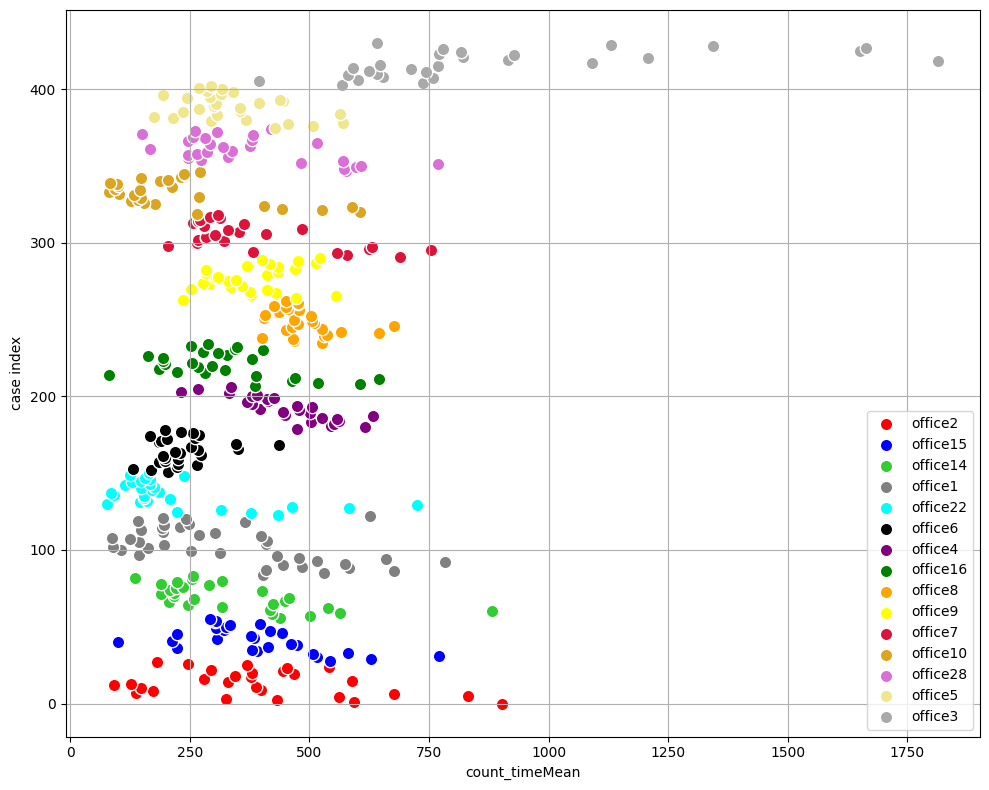

In [128]:
plt.figure(figsize=[10, 8])

#カラーマップ等の準備
markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
          "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")
start_index = 0

for idx, target_office_name in enumerate(office_list):
    datas = df_total[df_total['office'] == target_office_name]["count_timeMean"]

    end_index = len(datas)+start_index
    print(start_index, end_index)
    plt.scatter(datas, range(start_index, end_index), 
                s=80, c=colors[idx], marker=markers[2], edgecolor="white", label=target_office_name)
    start_index = end_index

    

plt.ylabel("case index")
plt.xlabel("count_timeMean")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

In [178]:
db_path = '/mnt/MachineLearning/OptunaLog/officeSplit_study--batch_shuffle.db'

test_office = "office10"

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

# best_model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1.e-5),
#     loss='mse',
#     metrics=['mae']
# )

fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=True)
X_index_fit = X_index[fit_ID]

X_pc_fit, X_pc_test = X_pc[fit_ID], X_pc[test_ID]
X_meta_fit, X_meta_test = X_meta[fit_ID], X_meta[test_ID]
y_fit, y_test = y[fit_ID], y[test_ID]

test_history = best_model.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)

Epoch 1/200
7/7 [==============================] - 1s 76ms/step - loss: 24274.7324 - mae: 151.1248 - val_loss: 16183.7559 - val_mae: 123.2973
Epoch 2/200
7/7 [==============================] - 0s 46ms/step - loss: 7577.1084 - mae: 75.4036 - val_loss: 11159.0020 - val_mae: 100.8254
Epoch 3/200
7/7 [==============================] - 0s 55ms/step - loss: 3902.8201 - mae: 49.6840 - val_loss: 11201.4287 - val_mae: 101.0138
Epoch 4/200
7/7 [==============================] - 0s 50ms/step - loss: 2324.3662 - mae: 39.7494 - val_loss: 11377.0732 - val_mae: 101.8644
Epoch 5/200
7/7 [==============================] - 0s 51ms/step - loss: 2045.8497 - mae: 36.9383 - val_loss: 9879.1504 - val_mae: 94.1893
Epoch 6/200
7/7 [==============================] - 0s 50ms/step - loss: 1924.5459 - mae: 34.5654 - val_loss: 9718.2734 - val_mae: 93.3063
Epoch 7/200
7/7 [==============================] - 0s 48ms/step - loss: 1724.4675 - mae: 33.3373 - val_loss: 9890.2236 - val_mae: 94.2081
Epoch 8/200
7/7 [=======

In [115]:
print(f"Best trial (test for {test_office}):")

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

Best trial (test for office10):
  Value: 573.1525573730469
  Params: 
    activation: ELU
    batch_size: 16
    conv_layers: 2
    dense_layers: 2
    dropout: None
    filters-0: 32
    filters-1: 224
    is_BatchNormalization_necessary: True
    is_HeNormalization_necessary: False
    lr: 0.01898646502112845
    momentum_bn: 0.0
    units-0: 512
    units-1: 64


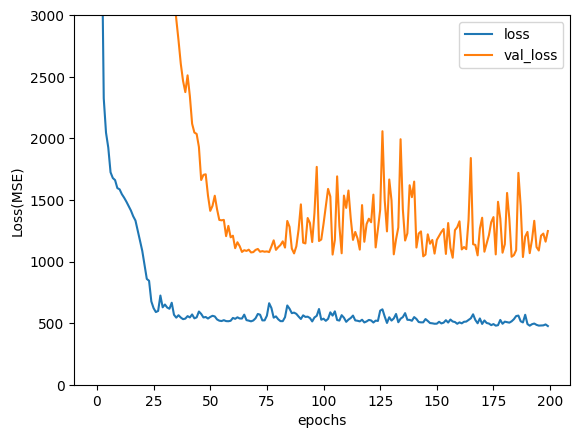

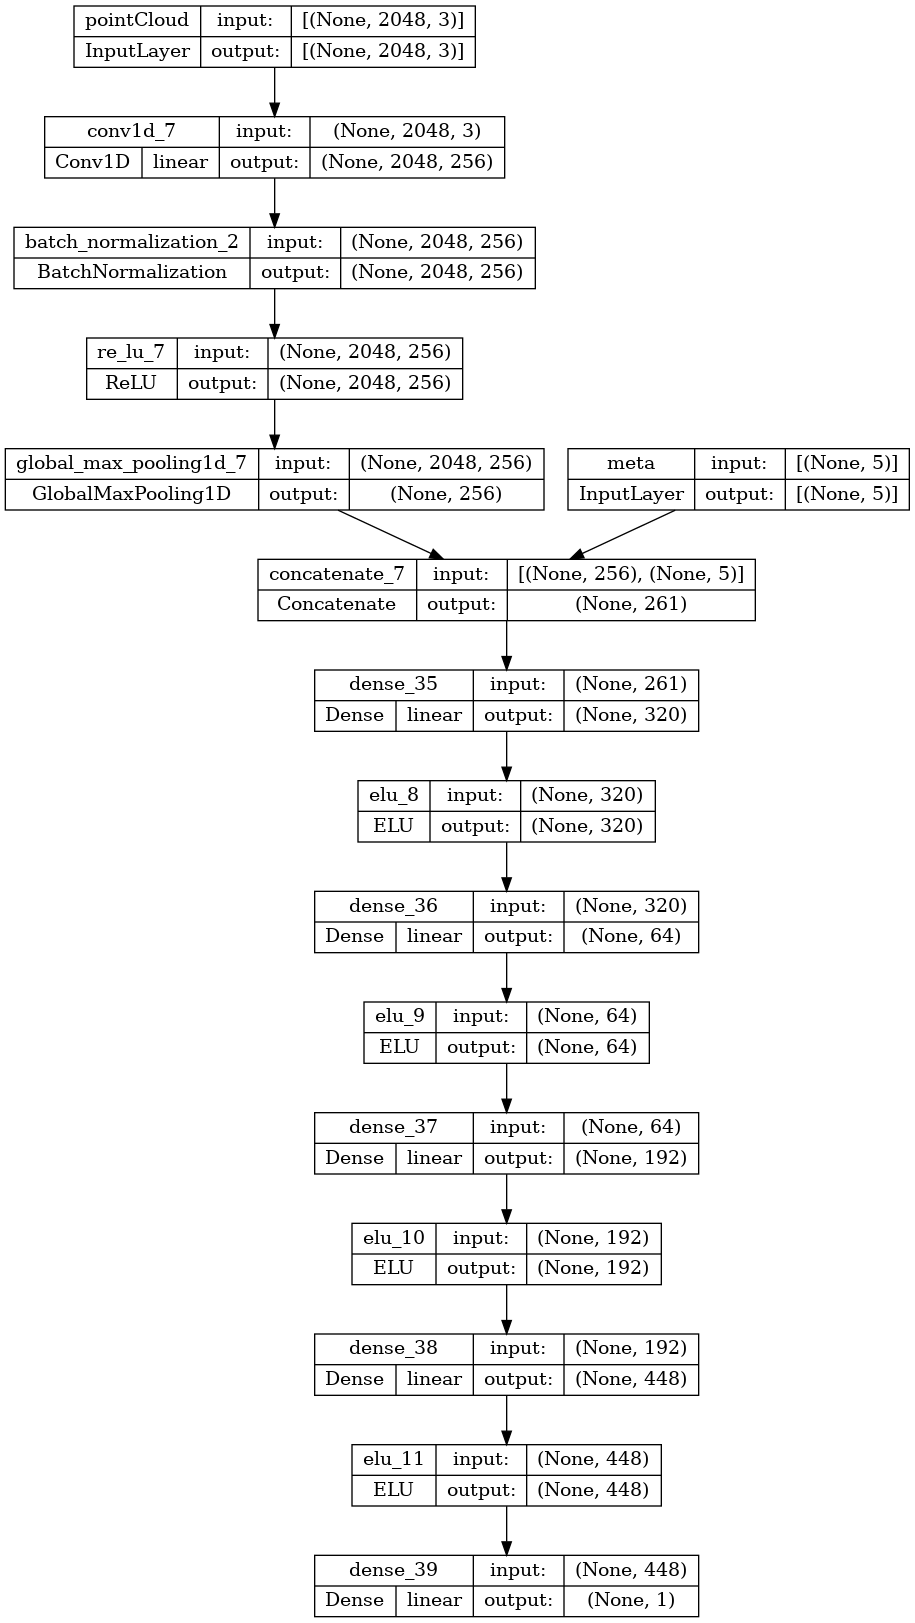

In [181]:
# plot_history(test_history.history)
plot_history(test_history.history, ymax=3000)

keras.utils.plot_model(best_model, show_shapes=True, show_layer_activations=True,)

In [ ]:
test_office = "office1"
result_dict = test_dict[test_office]

print(f"Best trial (test for {test_office}):")
best_trial = result_dict["best_trial"]

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

keras.utils.plot_model(total_model_builder(best_trial), show_shapes=True, show_layer_activations=True,)

In [79]:
import gc
 
gc.collect()

12558

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

best_model = total_model_builder(best_trial)

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)

best_history = best_model.fit(
    {'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
    batch_size = 128,
    epochs = 1000,
    validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
    callbacks=[estop]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

best_model = total_model_builder(best_trial)

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=100)

test_history = best_model.fit(
    {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    batch_size = 128,
    epochs = 1000,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    callbacks=[estop]
)